#### Versions 
First version: August 2013 

RFS final version: October 2017 

Refactored version*: January 2023 

*this program is tested on 3.8.5 version of python. The code was refactored from previous version based on Python 2.7. Not all code refactoring might have been tested/completed. 

Please cite code as accompanying material to
Greenwood, R., Hanson, S.G. and Liao, G.Y., 2018. Asset price dynamics in partially segmented markets. The Review of Financial Studies, 31(9), pp.3307-3343.


In [2]:
from importlib import reload as reload


In [3]:
import numdifftools as nd

In [4]:
#from importlib import reload
import slow2mktlib 
reload(slow2mktlib)
from slow2mktlib import *
import slow2mktlib_duffie 
reload(slow2mktlib_duffie)
from slow2mktlib_duffie import *
from IPython.display import display
rcParams.update({'legend.fontsize': 11.5})
rcParams.update({'savefig.dpi': 300})
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
# rcParams.update({'pad_inches':0.1})

In [20]:
 sys.version_info

sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)

# Calibration/Fig1: impact of unanticipated shock to A

In [5]:
# parameters
para={"k":8,"tau":175. ,"sigmasA":1.0,"sigmasB":1.0,"pA":0.45,"pB":0.45,"smA":5.0,"smB":5.0,"rhosA":0.999,
      "rhosB":0.999,"rhor":0.96,"rhoz":0.96,"sigmar":0.16,"sigmaz":0.10,"rm":1.0,"zm":0.1,"DA":20.0,"DB":20.0}


# Solution
solntup,solncore,_=funSolveUnique(para,niter=1)
df=funSimulateEV(solntup,bshock=0,shock=5.0,t_announce=5,t_implement=5,bse=1,decompose=1,T=30)

0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


ErxA pre-shock 0.794603
ErxA short-run reaction 0.799403
ErxA long-run reaction 0.556522
ErxA overreaction as a fraction 0.420291
yA pre-shock 4.794603
yA short-run reaction 0.590843
yA long-run reaction 0.546339
yA overreaction as a fraction 0.065322
ErxB pre-shock 1.073650
ErxB short-run reaction 0.043017
ErxB long-run reaction 0.225522
ErxB overreaction as a fraction -0.825395
yB pre-shock 5.473650
yB short-run reaction 0.198612
yB long-run reaction 0.221072
yB overreaction as a fraction -0.117731


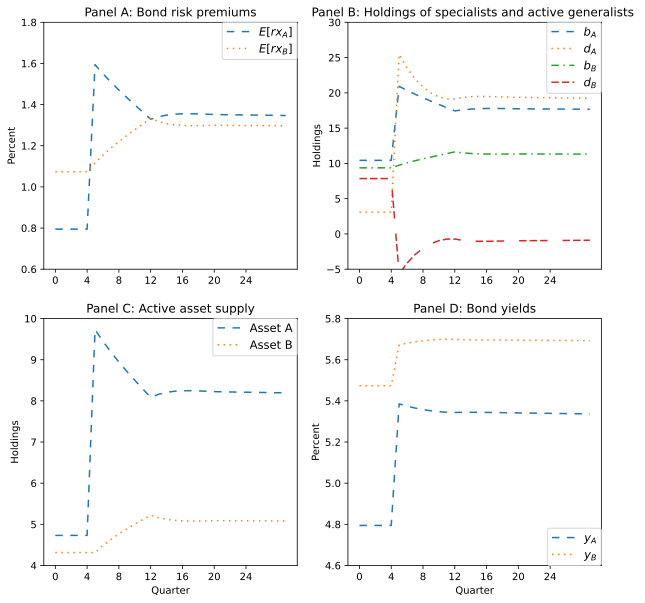

In [6]:
#Graph
fig, axes=plt.subplots(2,2,figsize=[10,10])
df.loc[:,['ErxA','ErxB']]=df.loc[:,['ErxA','ErxB']]*4.
df.loc[:,['yA','yB']]=df.loc[:,['yA','yB']]*4.

df.loc[:,['ErxA','ErxB']].plot(ax=axes[0,0],ylim=[0.6,1.8],title='Panel A: Bond risk premiums')
df.loc[:,['bA','dA','bB','dB']].plot(ax=axes[0,1],ylim=[-5,30],title='Panel B: Holdings of specialists and active generalists ')
df.loc[:,['supplyA','supplyB']].plot(ax=axes[1,0],ylim=[4,10],title='Panel C: Active asset supply')
df.loc[:,['yA','yB']].plot(ax=axes[1,1],ylim=[4.6,5.8],title='Panel D: Bond yields')

# Legends
axes[0,0].legend(['$E$[$rx_A$]','$E$[$rx_B$]'],loc='best', borderaxespad=0.)
axes[0,1].legend(['$b_A$','$d_A$','$b_B$','$d_B$'],loc='upper right', borderaxespad=0.)
axes[1,0].legend(['Asset A','Asset B'],loc='best', borderaxespad=0.)
axes[1,1].legend(['$y_A$','$y_B$'],loc='lower right', borderaxespad=0.)
# axes[0,0].set_xlabel("Quarter")
# axes[0,1].set_xlabel("Quarter")
axes[1,0].set_xlabel("Quarter")
axes[1,1].set_xlabel("Quarter")

axes[0,0].set_ylabel("Percent")
axes[0,1].set_ylabel("Holdings")
axes[1,0].set_ylabel("Holdings")
axes[1,1].set_ylabel("Percent")

axes[0,0].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[0,1].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[1,0].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[1,1].xaxis.set_ticks(np.arange(0, 25, 4.0))

setAxLinesBW2(axes[0,0])
setAxLinesBW2(axes[0,1])
setAxLinesBW2(axes[1,0])
setAxLinesBW2(axes[1,1])
savefig('fig1.jpg')
savefig('fig1.eps')

# Print statistics in for Table 2
print ('ErxA pre-shock %f' % np.array(df[['ErxA']].iloc[4]))
print ('ErxA short-run reaction %f' % np.array(df[['ErxA']].iloc[5]-df[['ErxA']].iloc[4]))
print ('ErxA long-run reaction %f' % np.array(df[['ErxA']].iloc[21]-df[['ErxA']].iloc[4]))
print ('ErxA overreaction as a fraction %f' % np.array((df[['ErxA']].iloc[5]-df[['ErxA']].iloc[21])/(df[['ErxA']].iloc[21]-df[['ErxA']].iloc[4])-(1-0.999**16)/0.999**16))

print ('yA pre-shock %f' % np.array(df[['yA']].iloc[4]))
print ('yA short-run reaction %f' % np.array(df[['yA']].iloc[5]-df[['yA']].iloc[4]))
print ('yA long-run reaction %f' % np.array(df[['yA']].iloc[21]-df[['yA']].iloc[4]))
print ('yA overreaction as a fraction %f' % np.array((df[['yA']].iloc[5]-df[['yA']].iloc[21])/(df[['yA']].iloc[21]-df[['yA']].iloc[4])-(1-0.999**16)/0.999**16))

print ('ErxB pre-shock %f' % np.array(df[['ErxB']].iloc[4]))
print ('ErxB short-run reaction %f' % np.array(df[['ErxB']].iloc[5]-df[['ErxB']].iloc[4]))
print ('ErxB long-run reaction %f' % np.array(df[['ErxB']].iloc[21]-df[['ErxB']].iloc[4]))
print ('ErxB overreaction as a fraction %f' % np.array((df[['ErxB']].iloc[5]-df[['ErxB']].iloc[21])/(df[['ErxB']].iloc[21]-df[['ErxB']].iloc[4])-(1-0.999**16)/0.999**16))

print ('yB pre-shock %f' % np.array(df[['yB']].iloc[4]))
print ('yB short-run reaction %f' % np.array(df[['yB']].iloc[5]-df[['yB']].iloc[4]))
print ('yB long-run reaction %f' % np.array(df[['yB']].iloc[21]-df[['yB']].iloc[4]))
print ('yB overreaction as a fraction %f' % np.array((df[['yB']].iloc[5]-df[['yB']].iloc[21])/(df[['yB']].iloc[21]-df[['yB']].iloc[4])-(1-0.999**16)/0.999**16))

## Fig 2: unpacking comparison

0
0
0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


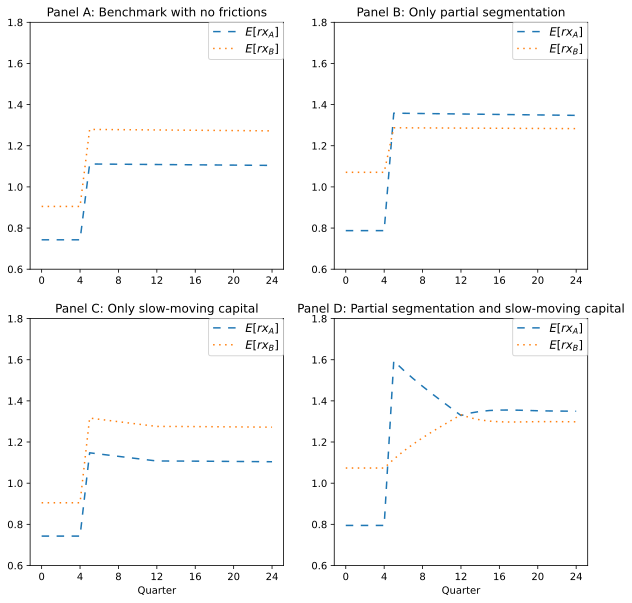

In [7]:
fig,axes=plt.subplots(2,2,figsize=[10,10])
# Upper Left
para_nofrictions={"k":1,"tau":175. ,"sigmasA":1.0,"sigmasB":1.0,"pA":0.001,"pB":0.001,"smA":5.0,"smB":5.0,"rhosA":0.999,
               "rhosB":0.999,"rhor":0.96,"rhoz":0.96,"sigmar":0.16,"sigmaz":0.10,"rm":1.0,"zm":0.1,"DA":20.0,"DB":20.0}
solntup,solncore,_=funSolveUnique(para_nofrictions,niter=1)
dfB=funSimulateEV(solntup,bshock=0,shock=5.0,t_announce=5,t_implement=5,bse=1,decompose=1)
dfB.loc[:,['ErxA','ErxB']]=dfB.loc[:,['ErxA','ErxB']]*4.
dfB.loc[:,['yA','yB']]=dfB.loc[:,['yA','yB']]*4.
dfB.loc[:,['ErxA','ErxB']].plot(ax=axes[0,0],ylim=[0.6,1.8],title='Panel A: Benchmark with no frictions')


# upper right: only partial segmentation
para_partseg={"k":1,"tau":175. ,"sigmasA":1.0,"sigmasB":1.0,"pA":0.45,"pB":0.45,"smA":5.0,"smB":5.0,"rhosA":0.999,
               "rhosB":0.999,"rhor":0.96,"rhoz":0.96,"sigmar":0.16,"sigmaz":0.10,"rm":1.0,"zm":0.1,"DA":20.0,"DB":20.0}
solntup,solncore,_=funSolveUnique(para_partseg,niter=1)
dfB=funSimulateEV(solntup,bshock=0,shock=5.0,t_announce=5,t_implement=5,bse=1,decompose=1)
dfB.loc[:,['ErxA','ErxB']]=dfB.loc[:,['ErxA','ErxB']]*4.
dfB.loc[:,['yA','yB']]=dfB.loc[:,['yA','yB']]*4.
dfB.loc[:,['ErxA','ErxB']].plot(ax=axes[0,1],ylim=[0.6,1.8],title='Panel B: Only partial segmentation')


# bottom left: duffie
para_duffie={"k":8,"tau":175. ,"sigmasA":1.0,"sigmasB":1.0,"q":0.9,"smA":5.0,"smB":5.0,"rhosA":0.999,
               "rhosB":0.999,"rhor":0.96,"rhoz":0.96,"sigmar":0.16,"sigmaz":0.10,"rm":1.0,"zm":0.1,"DA":20.0,"DB":20.0}
solntup,solncore,_=funSolveUniqueDuffie(para_duffie)
df=funSimulateEVDuffie(solntup,bshock=0,shock=5.0,t_announce=5,t_implement=5,bse=1,decompose=1)
df.loc[:,['ErxA','ErxB']]=df.loc[:,['ErxA','ErxB']]*4.
df.loc[:,['yA','yB']]=df.loc[:,['yA','yB']]*4.
df.loc[:,['ErxA','ErxB']].plot(ax=axes[1,0],ylim=[0.6,1.8],title='Panel C: Only slow-moving capital') #ax=axes[1,0],

#bottom right: ours
para={"k":8,"tau":175. ,"sigmasA":1.0,"sigmasB":1.0,"pA":0.45,"pB":0.45,"smA":5.0,"smB":5.0,"rhosA":0.999,
               "rhosB":0.999,"rhor":0.96,"rhoz":0.96,"sigmar":0.16,"sigmaz":0.10,"rm":1.0,"zm":0.1,"DA":20.0,"DB":20.0}
solntup,solncore,_=funSolveUnique(para,niter=1)
df=funSimulateEV(solntup,bshock=0,shock=5.0,t_announce=5,t_implement=5,bse=1,decompose=1)
df.loc[:,['ErxA','ErxB']]=df.loc[:,['ErxA','ErxB']]*4.
df.loc[:,['yA','yB']]=df.loc[:,['yA','yB']]*4.
df.loc[:,['ErxA','ErxB']].plot(ax=axes[1,1],ylim=[0.6,1.8],title='Panel D: Partial segmentation and slow-moving capital')

# Legends
axes[0,0].legend(['$E$[$rx_A$]','$E$[$rx_B$]'],loc='best', borderaxespad=0.)
axes[0,1].legend(['$E$[$rx_A$]','$E$[$rx_B$]'],loc='best', borderaxespad=0.)
axes[1,0].legend(['$E$[$rx_A$]','$E$[$rx_B$]'],loc='best', borderaxespad=0.)
axes[1,1].legend(['$E$[$rx_A$]','$E$[$rx_B$]'],loc='best', borderaxespad=0.)
#axes[0,0].set_xlabel("Quarter")
#axes[0,1].set_xlabel("Quarter")
axes[1,0].set_xlabel("Quarter")
axes[1,1].set_xlabel("Quarter")


axes[0,0].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[0,1].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[1,0].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[1,1].xaxis.set_ticks(np.arange(0, 25, 4.0))

setAxLinesBW2(axes[0,0])
setAxLinesBW2(axes[0,1])
setAxLinesBW2(axes[1,0])
setAxLinesBW2(axes[1,1])

fig.savefig('fig2.jpg')
fig.savefig('fig2.eps')


0
0
0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


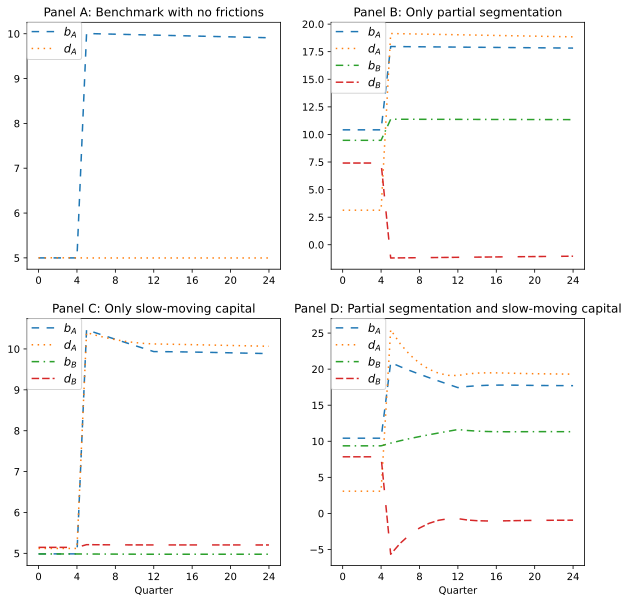

In [8]:
fig,axes=plt.subplots(2,2,figsize=[10,10])
# Upper Left
para_nofrictions={"k":1,"tau":175. ,"sigmasA":1.0,"sigmasB":1.0,"pA":0.001,"pB":0.001,"smA":5.0,"smB":5.0,"rhosA":0.999,
               "rhosB":0.999,"rhor":0.96,"rhoz":0.96,"sigmar":0.16,"sigmaz":0.10,"rm":1.0,"zm":0.1,"DA":20.0,"DB":20.0}
solntup,solncore,_=funSolveUnique(para_nofrictions,niter=1)
dfB=funSimulateEV(solntup,bshock=0,shock=5.0,t_announce=5,t_implement=5,bse=1,decompose=1)
dfB.loc[:,['ErxA','ErxB']]=dfB.loc[:,['ErxA','ErxB']]*4.
dfB.loc[:,['yA','yB']]=dfB.loc[:,['yA','yB']]*4.
dfB.loc[:,['dA','dB']].plot(ax=axes[0,0],title='Panel A: Benchmark with no frictions')


# upper right: only partial segmentation
para_partseg={"k":1,"tau":175. ,"sigmasA":1.0,"sigmasB":1.0,"pA":0.45,"pB":0.45,"smA":5.0,"smB":5.0,"rhosA":0.999,
               "rhosB":0.999,"rhor":0.96,"rhoz":0.96,"sigmar":0.16,"sigmaz":0.10,"rm":1.0,"zm":0.1,"DA":20.0,"DB":20.0}
solntup,solncore,_=funSolveUnique(para_partseg,niter=1)
dfB=funSimulateEV(solntup,bshock=0,shock=5.0,t_announce=5,t_implement=5,bse=1,decompose=1)
dfB.loc[:,['ErxA','ErxB']]=dfB.loc[:,['ErxA','ErxB']]*4.
dfB.loc[:,['yA','yB']]=dfB.loc[:,['yA','yB']]*4.
dfB.loc[:,['bA','dA','bB','dB']].plot(ax=axes[0,1],title='Panel B: Only partial segmentation')


# bottom left: duffie
para_duffie={"k":8,"tau":175. ,"sigmasA":1.0,"sigmasB":1.0,"q":0.9,"smA":5.0,"smB":5.0,"rhosA":0.999,
               "rhosB":0.999,"rhor":0.96,"rhoz":0.96,"sigmar":0.16,"sigmaz":0.10,"rm":1.0,"zm":0.1,"DA":20.0,"DB":20.0}
solntup,solncore,_=funSolveUniqueDuffie(para_duffie)
df=funSimulateEVDuffie(solntup,bshock=0,shock=5.0,t_announce=5,t_implement=5,bse=1,decompose=1)
df.loc[:,['ErxA','ErxB']]=df.loc[:,['ErxA','ErxB']]*4.
df.loc[:,['yA','yB']]=df.loc[:,['yA','yB']]*4.
df.loc[:,['bA','dA','bB','dB']].plot(ax=axes[1,0],title='Panel C: Only slow-moving capital') #ax=axes[1,0],

#bottom right: ours
para={"k":8,"tau":175. ,"sigmasA":1.0,"sigmasB":1.0,"pA":0.45,"pB":0.45,"smA":5.0,"smB":5.0,"rhosA":0.999,
               "rhosB":0.999,"rhor":0.96,"rhoz":0.96,"sigmar":0.16,"sigmaz":0.10,"rm":1.0,"zm":0.1,"DA":20.0,"DB":20.0}
solntup,solncore,_=funSolveUnique(para,niter=1)
df=funSimulateEV(solntup,bshock=0,shock=5.0,t_announce=5,t_implement=5,bse=1,decompose=1)
df.loc[:,['ErxA','ErxB']]=df.loc[:,['ErxA','ErxB']]*4.
df.loc[:,['yA','yB']]=df.loc[:,['yA','yB']]*4.
df.loc[:,['bA','dA','bB','dB']].plot(ax=axes[1,1],title='Panel D: Partial segmentation and slow-moving capital')


# Legends
axes[0,0].legend(['$b_A$','$d_A$','$b_B$','$d_B$'],loc='best', borderaxespad=0.)
axes[0,1].legend(['$b_A$','$d_A$','$b_B$','$d_B$'],loc='best', borderaxespad=0.)
axes[1,0].legend(['$b_A$','$d_A$','$b_B$','$d_B$'],loc='best', borderaxespad=0.)
axes[1,1].legend(['$b_A$','$d_A$','$b_B$','$d_B$'],loc='best', borderaxespad=0.)
#axes[0,0].set_xlabel("Quarter")
#axes[0,1].set_xlabel("Quarter")
axes[1,0].set_xlabel("Quarter")
axes[1,1].set_xlabel("Quarter")



axes[0,0].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[0,1].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[1,0].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[1,1].xaxis.set_ticks(np.arange(0, 25, 4.0))

setAxLinesBW2(axes[0,0])
setAxLinesBW2(axes[0,1])
setAxLinesBW2(axes[1,0])
setAxLinesBW2(axes[1,1])

fig.savefig('fig2_quantities.jpg')
fig.savefig('fig2_quantities.eps')

# Figure 3: Price-impact of an anticipated supply shock  Figure 5: Portfolio adjustments in response to an anticipated supply shock

K=10
Announced at t=5; implemented at t=10 when a single shock is delivered

0


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


TypeError: must be real number, not PandasArray

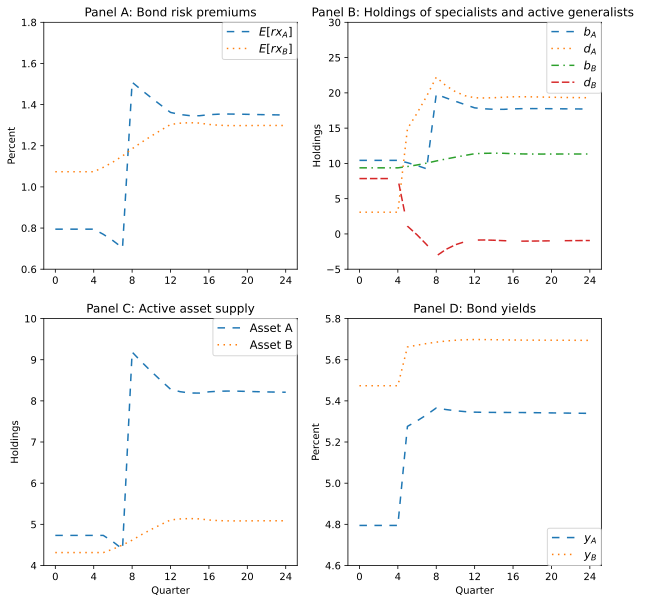

In [9]:
para={"k":8,"tau":175. ,"sigmasA":1.0,"sigmasB":1.0,"pA":0.45,"pB":0.45,"smA":5.0,"smB":5.0,"rhosA":0.999,
               "rhosB":0.999,"rhor":0.96,"rhoz":0.96,"sigmar":0.16,"sigmaz":0.10,"rm":1.0,"zm":0.1,"DA":20.0,"DB":20.0}

solntup,solncore,_=funSolveUnique(para,niter=1)
df=funSimulateEV(solntup,bshock=0,shock=5.0,t_announce=5,t_implement=8,T=25)
#Graph
fig, axes=plt.subplots(2,2,figsize=[10,10])
df.loc[:,['ErxA','ErxB']]=df.loc[:,['ErxA','ErxB']]*4.
df.loc[:,['yA','yB']]=df.loc[:,['yA','yB']]*4

# Plot
df.loc[:,['ErxA','ErxB']].plot(ax=axes[0,0],ylim=[0.6,1.8],title='Panel A: Bond risk premiums')
df.loc[:,['bA','dA','bB','dB']].plot(ax=axes[0,1],ylim=[-5,30],title='Panel B: Holdings of specialists and active generalists ')
df.loc[:,['supplyA','supplyB']].plot(ax=axes[1,0],ylim=[4,10],title='Panel C: Active asset supply')
df.loc[:,['yA','yB']].plot(ax=axes[1,1],ylim=[4.6,5.8],title='Panel D: Bond yields')

# Legends
axes[0,0].legend(['$E$[$rx_A$]','$E$[$rx_B$]'],loc='best', borderaxespad=0.)
axes[0,1].legend(['$b_A$','$d_A$','$b_B$','$d_B$'],loc='upper right', borderaxespad=0.)
axes[1,0].legend(['Asset A','Asset B'],loc='best', borderaxespad=0.)
axes[1,1].legend(['$y_A$','$y_B$'],loc='lower right', borderaxespad=0.)
# axes[0,0].set_xlabel("Quarter")
# axes[0,1].set_xlabel("Quarter")
axes[1,0].set_xlabel("Quarter")
axes[1,1].set_xlabel("Quarter")

axes[0,0].set_ylabel("Percent")
axes[0,1].set_ylabel("Holdings")
axes[1,0].set_ylabel("Holdings")
axes[1,1].set_ylabel("Percent")

setAxLinesBW2(axes[0,0])
setAxLinesBW2(axes[0,1])
setAxLinesBW2(axes[1,0])
setAxLinesBW2(axes[1,1])

axes[0,0].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[0,1].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[1,0].xaxis.set_ticks(np.arange(0, 25, 4.0))
axes[1,1].xaxis.set_ticks(np.arange(0, 25, 4.0))

savefig('fig3.jpg')
savefig('fig3.eps')

# Print statistics in for Table 2
print ('ErxA pre-shock %f' % array(df[['ErxA']].iloc[4]))
print ('ErxA short-run reaction %f' % array(df[['ErxA']].iloc[5]-df[['ErxA']].iloc[4]))
print ('ErxA long-run reaction %f' % array(df[['ErxA']].iloc[21]-df[['ErxA']].iloc[4]))
print ('ErxA overreaction as a fraction %f' % array((df[['ErxA']].iloc[5]-df[['ErxA']].iloc[21])/(df[['ErxA']].iloc[21]-df[['ErxA']].iloc[4])-(1-0.999**16)/0.999**16))

print ('yA pre-shock %f' % array(df[['yA']].iloc[4]))
print ('yA short-run reaction %f' % array(df[['yA']].iloc[5]-df[['yA']].iloc[4]))
print ('yA long-run reaction %f' % array(df[['yA']].iloc[21]-df[['yA']].iloc[4]))
print ('yA overreaction as a fraction %f' % array((df[['yA']].iloc[5]-df[['yA']].iloc[21])/(df[['yA']].iloc[21]-df[['yA']].iloc[4])-(1-0.999**16)/0.999**16))

print ('ErxB pre-shock %f' % array(df[['ErxB']].iloc[4]))
print ('ErxB short-run reaction %f' % array(df[['ErxB']].iloc[5]-df[['ErxB']].iloc[4]))
print ('ErxB long-run reaction %f' % array(df[['ErxB']].iloc[21]-df[['ErxB']].iloc[4]))
print ('ErxB overreaction as a fraction %f' % array((df[['ErxB']].iloc[5]-df[['ErxB']].iloc[21])/(df[['ErxB']].iloc[21]-df[['ErxB']].iloc[4])-(1-0.999**16)/0.999**16))

print ('yB pre-shock %f' % array(df[['yB']].iloc[4]))
print ('yB short-run reaction %f' % array(df[['yB']].iloc[5]-df[['yB']].iloc[4]))
print ('yB long-run reaction %f' % array(df[['yB']].iloc[21]-df[['yB']].iloc[4]))
print ('yB overreaction as a fraction %f' % array((df[['yB']].iloc[5]-df[['yB']].iloc[21])/(df[['yB']].iloc[21]-df[['yB']].iloc[4])-(1-0.999**16)/0.999**16))

# comparative statics 

In [ ]:
import slow2mktlib 
reload(slow2mktlib)
from slow2mktlib import *
## comparative statics
para_standard={"k":8,"tau":175. ,"sigmasA":1.0,"sigmasB":1.0,"pA":0.45,"pB":0.45,"smA":5.0,"smB":5.0,"rhosA":0.999,
               "rhosB":0.999,"rhor":0.96,"rhoz":0.96,"sigmar":0.16,"sigmaz":0.10,"rm":1.0,"zm":0.1,"DA":20.0,"DB":20.0}

#1-2: $\tau$
paravary=[{"tau":175.},{"tau":200.}]
para=para_standard.copy()
dfcs_tau,psims=funCS(paravary,para,T=30)

#funPlotCS(psims)
#psims.transpose(0,2,1).to_frame().T.to_clipboard()
#dfcs.to_clipboard()

#3: No generalists
paravary=[{"pA":.49999,"pB":.49999}]
para=para_standard.copy()
dfcs_nogeneralist,psims=funCS(paravary,para,T=30)
#display(dfcs)
#funPlotCS(psims)
#dfcs.to_clipboard()

#4-5: Comp. Stats. on pA, pB fixed holding fixed total number of specialist
paravary=[{"pA":.3,"pB":.6},{"pA":.6,"pB":.3}]
para=para_standard.copy()
dfcs_specialist,psims=funCS(paravary,para,T=30)
#display(dfcs)
#funPlotCS(psims)

#6-7: Comp. Stats. on k
paravary=[{"k":12},{"k":4}]
para=para_standard.copy()
dfcs_k,psims=funCS(paravary,para,T=30)
#display(dfcs)
#funPlotCS(psims)
#psims.transpose(0,2,1).to_frame().T.to_clipboard()

#8: Over-reaction in both
paravary=[{"k":4,"pA":.2,"pB":.2}]
para=para_standard.copy()
dfcs_overreact,psims=funCS(paravary,para,T=30)
#display(dfcs)
#funPlotCS(psims)

#9:Comp. Stats on $\sigma_z$
paravary=[{"sigmaz":0.16}]
para=para_standard.copy()
dfcs_defaultrisk,psims=funCS(paravary,para,T=30)
#display(dfcs)
#funPlotCS(psims)

dfcs= concat((dfcs_tau,dfcs_nogeneralist,dfcs_specialist,dfcs_k,dfcs_overreact,dfcs_defaultrisk))
table2=dfcs[['ErxA_preshock','ErxA_short','ErxA_long','ErxA_overreact','yA_preshock','yA_short','yA_long','yA_overreact','ErxB_preshock','ErxB_short','ErxB_long','ErxB_overreact','yB_preshock','yB_short','yB_long','yB_overreact']]
display(table2)
table2.to_clipboard()
table2.to_csv('compstats.csv')